In [1]:
import salem
import matplotlib.pyplot as plt
import numpy as np

In [2]:
anl = salem.open_wrf_dataset("/home/carlos/Documents/INPE2019/GDAD/SMR/singleobs/tupa/gsi/wrf_inout.2015010106", decode_times=False)

In [3]:
bkg = salem.open_wrf_dataset("/home/carlos/Documents/INPE2019/GDAD/SMR/singleobs/tupa/wrf/wrfout_d01_2015-01-01_00:00:00", decode_times=False)

In [4]:
anl_T = anl.T.isel(bottom_top=20,time=0)

In [5]:
bkg_T = bkg.T.isel(bottom_top=20,time=-1)

In [6]:
anl_incr = anl_T - bkg_T

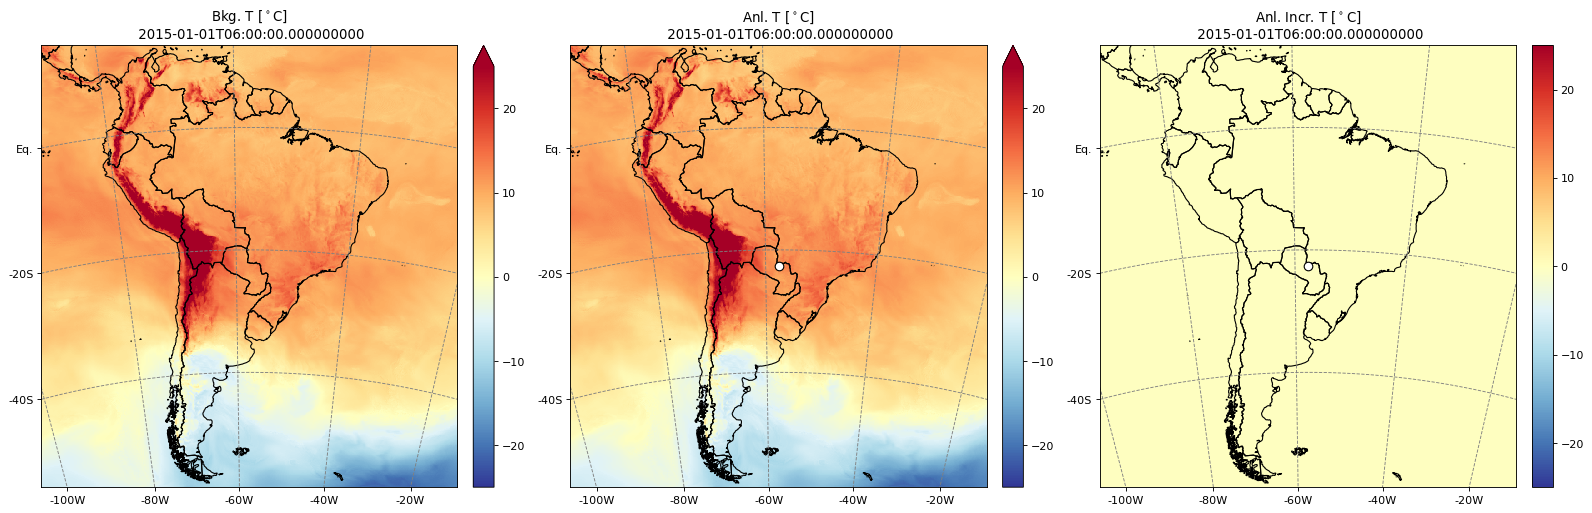

In [7]:
f = plt.figure(figsize=(20,15), dpi=80)

# Background field
ax = plt.subplot(1,3,1)
#bkg_T.salem.quick_map(vmin=-25,vmax=25,cmap='RdYlBu_r')
sm1 = bkg.salem.get_map(vmin=-25,vmax=25,cmap='RdYlBu_r')
sm1.set_data(bkg_T)
#sm.set_points(-57.67801,-22.67801) #lon/lat
#sm.set_text(-57.67801,-22.67801, 'obs', fontsize=17)
dbkg = np.asarray(bkg_T.time)
sm1.visualize(title="Bkg. T [$^\circ$C]\n %s" % str(dbkg))

# Analysis field
ax = plt.subplot(1,3,2)
#anl_T.salem.quick_map(vmin=-25,vmax=25,cmap='RdYlBu_r')
sm2 = anl.salem.get_map(vmin=-25,vmax=25,cmap='RdYlBu_r')
sm2.set_data(anl_T)
sm2.set_points(-57.67801,-22.67801) #lon/lat
#sm.set_text(-57.67801,-22.67801, 'obs', fontsize=17)
danl = np.asarray(anl_T.time)
sm2.visualize(title="Anl. T [$^\circ$C]\n %s" % str(danl))

# Analysis increment field
ax = plt.subplot(1,3,3)
sm3 = anl.salem.get_map(vmin=-25,vmax=25,cmap='RdYlBu_r')
sm3.set_data(anl_incr)
sm3.set_points(-57.67801,-22.67801) #lon/lat
#sm.set_text(-57.67801,-22.67801, 'obs', fontsize=17)
sm3.visualize(title="Anl. Incr. T [$^\circ$C]\n %s" % str(danl))

# Save figure
plt.tight_layout()
plt.savefig("./incr_anl.png")